In [1]:
#Import ratinabox
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *

import matplotlib
%matplotlib inline

In [2]:
env = Environment(params={'scale':1.4, 'aspect':1})

(<Figure size 420x420 with 1 Axes>, <AxesSubplot: >)

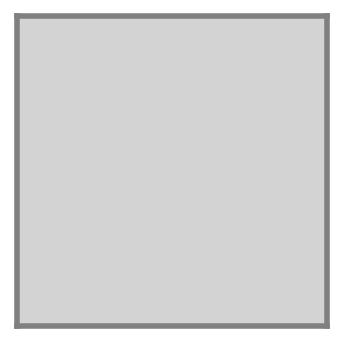

In [3]:
env.plot_environment()

In [4]:
agent = Agent(env, params={
    "dt": 0.01,
    "speed_coherence_time": 0.7,
    "speed_mean": 0.2,
    "rotational_velocity_coherence_time": 0.08,
    "rotational_velocity_std": 120 * (np.pi / 180),
    "thigmotaxis": 0.5,
})

In [5]:
place_cells = PlaceCells(agent, params={
    "n": 20,
    "name": "PlaceCells",
    "description": "gaussian",
    "widths": 0.20,
    "place_cell_centres": None,  # if given this will overwrite 'n',
    "wall_geometry": "line_of_sight",
    "min_fr": 0,
    "max_fr": 1,
    "name": "PlaceCells",
})

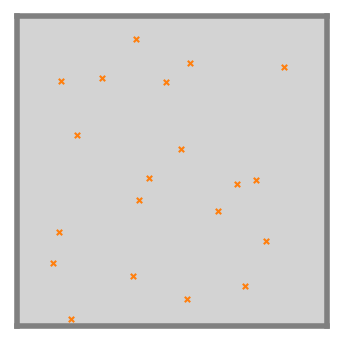

In [6]:
fig, ax = place_cells.plot_place_cell_locations()

In [7]:
from tqdm import tqdm #gives time bar

fps = 30
dt = 1./fps # seconds
t_max = 1*10 # seconds

for i in tqdm(range(int(t_max/dt))):
    agent.update(dt=dt)
    place_cells.update()

100%|███████████████████████████████████████| 300/300 [00:00<00:00, 1028.00it/s]


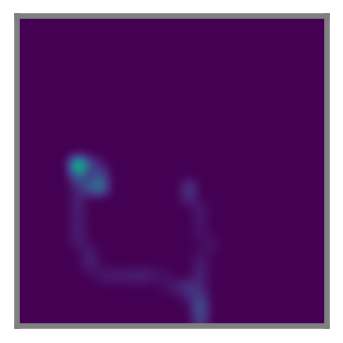

In [8]:
# plot history
fig, ax = agent.plot_position_heatmap()

In [9]:
anim = agent.animate_trajectory(speed_up=10)

In [10]:
from IPython import display
video = anim.to_html5_video()

In [11]:
html = display.HTML(video)
display.display(html)

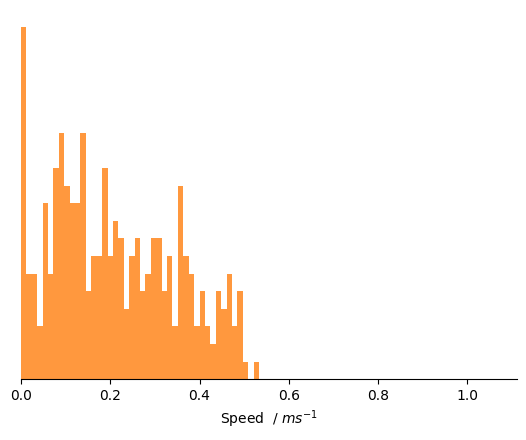

In [12]:
fig, ax = agent.plot_histogram_of_speeds()

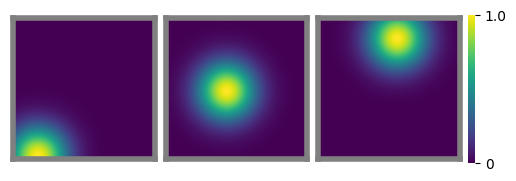

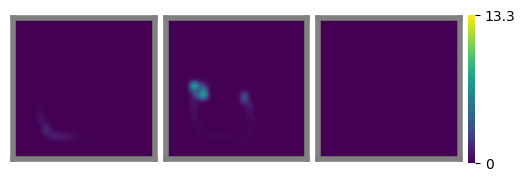

In [13]:
# 10 Plot rate maps. 
fig, ax = place_cells.plot_rate_map(chosen_neurons='3',method='groundtruth')
fig, ax = place_cells.plot_rate_map(chosen_neurons='3',method='history',spikes=True)

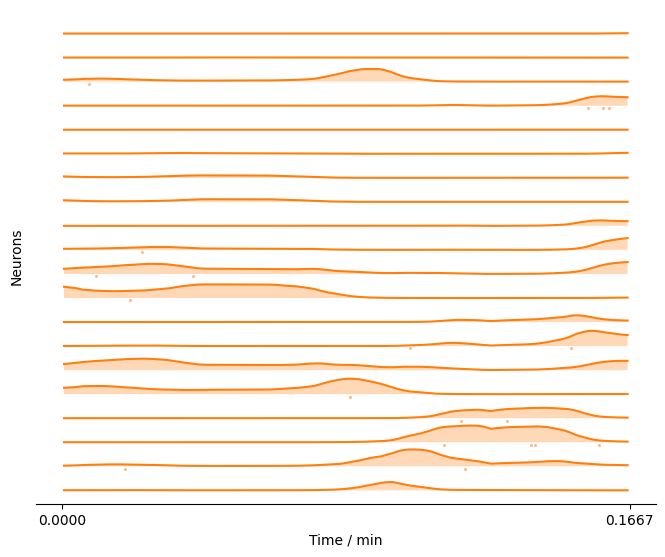

In [14]:
fig, ax = place_cells.plot_rate_timeseries()

(<Figure size 800x400 with 1 Axes>,
 <AxesSubplot: xlabel='Time / min', ylabel='Neurons'>)

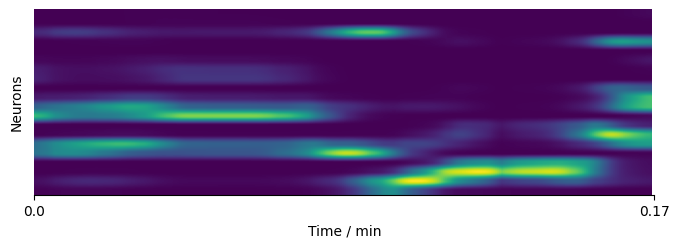

In [15]:
place_cells.plot_rate_timeseries(imshow=True)

In [16]:
print("Timestamps:", agent.history['t'][:10],"\n")
print("Positions:", agent.history['pos'][:10],"\n")
print("Firing rate timeseries:", place_cells.history['firingrate'][:10],"\n")
print("Spikes:", place_cells.history['spikes'][:10],"\n")

Timestamps: [0.03333333333333333, 0.06666666666666667, 0.1, 0.13333333333333333, 0.16666666666666666, 0.19999999999999998, 0.2333333333333333, 0.26666666666666666, 0.3, 0.3333333333333333] 

Positions: [[0.2899307599652797, 0.6844804191830407], [0.2930368780976534, 0.6808396356724179], [0.29632473205324844, 0.6776431808883301], [0.298978267565607, 0.674582242705002], [0.30197906959916865, 0.6712074708863714], [0.3047312372591018, 0.667118252373658], [0.3077794339088124, 0.6616830769510168], [0.31065498418821014, 0.654825043940163], [0.3131747528471805, 0.6479128971098446], [0.31640539486963243, 0.6386590150567879]] 

Firing rate timeseries: [[0.005033845396234083, 0.036320703559747744, 0.00109820274362695, 4.625647838084768e-05, 0.3781790387007213, 0.35764118854808385, 0.006041005585455647, 5.438480032819862e-05, 0.6649043083703651, 0.30711948988724047, 0.06704139825196699, 0.0004138626630375732, 0.09490277301786612, 0.08158638968406756, 0.017855853543714027, 1.3463925583937842e-06, 0.

In [17]:
positions = agent.history['pos']

In [18]:
np.save("timestamps.npy", np.array(agent.history['t']))
np.save("positions.npy", np.array(positions))

In [19]:
thetas = []

for idx in range(len(positions)-1):
    a = positions[idx]
    b = positions[idx+1]
    
    dy = b[1] - a[1]
    dx = b[0] - a[0]

    if dx > 0:
        theta = np.arctan(dy/dx)
        theta -= np.pi/2
    else:
        theta = np.arctan(dy/dx)
        theta += np.pi/2

    thetas.append(theta)

In [20]:
np.save("thetas.npy", np.array(thetas))

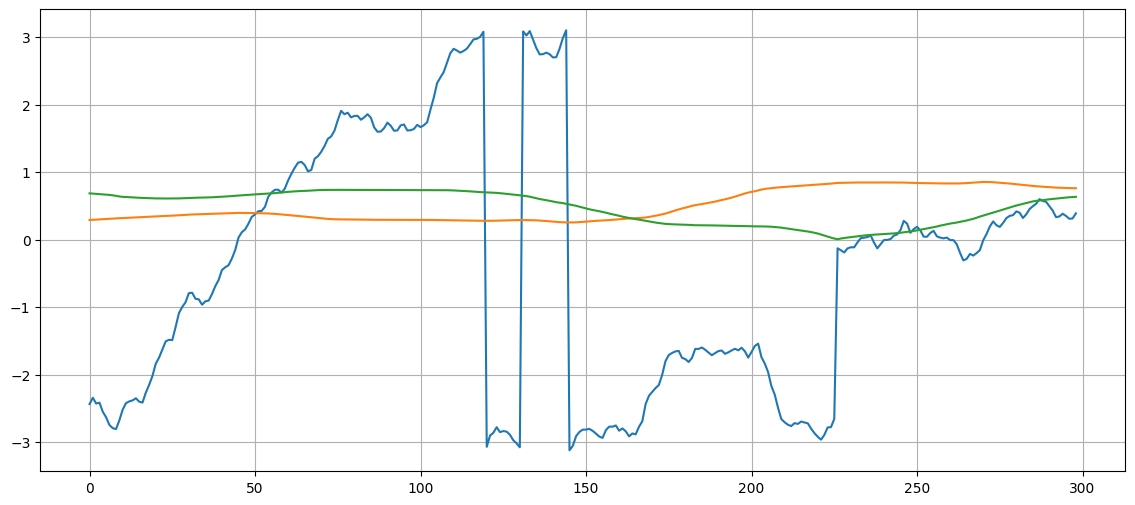

In [32]:
plt.figure(figsize=(14, 6))

plt.plot(thetas)
plt.plot(positions[:-1])
plt.grid()

plt.show()

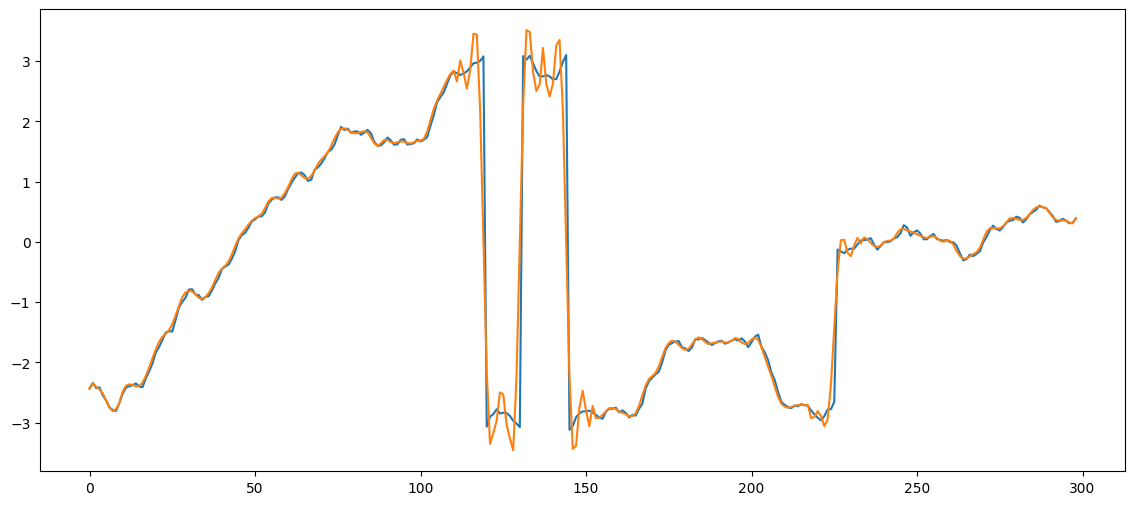

In [22]:
thetas_smooth = scipy.signal.savgol_filter(
    thetas,
    20,
    10,
    deriv=0,
    delta=1.0,
)

plt.figure(figsize=(14, 6))

plt.plot(thetas)
plt.plot(thetas_smooth)

plt.show()